In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
from IPython.display import HTML, display
from scipy.stats import expon, kde, kstest
from numpy import inf,linspace

In [3]:
data_path2 = "C:/Users/Anusha/Documents/Copied on 9_26_19/Fall 2019/Data Science/Project/GoogleMeetUpdated2.csv"
callminutes = pd.read_csv(data_path2)
callminutes['time'] = pd.to_datetime(callminutes['time'],utc=True)
callminutes.set_index('time', inplace=True)

Text(0.5, 0, 'Year')

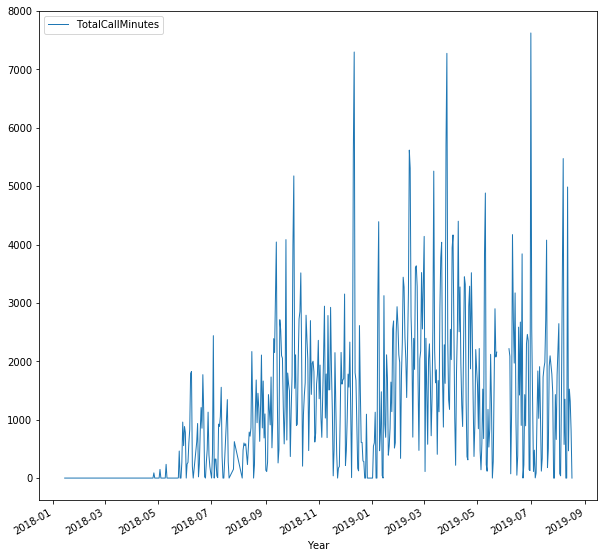

In [17]:
callminutes.plot(figsize=(10,10), linewidth=1, fontsize=10)
plt.xlabel('Year', fontsize=10)

It follows the exponential distribution, the exponential starts high and has a long tail that trails off to the right that contains rare cases and we have continuous data. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027D597E57F0>]],
      dtype=object)

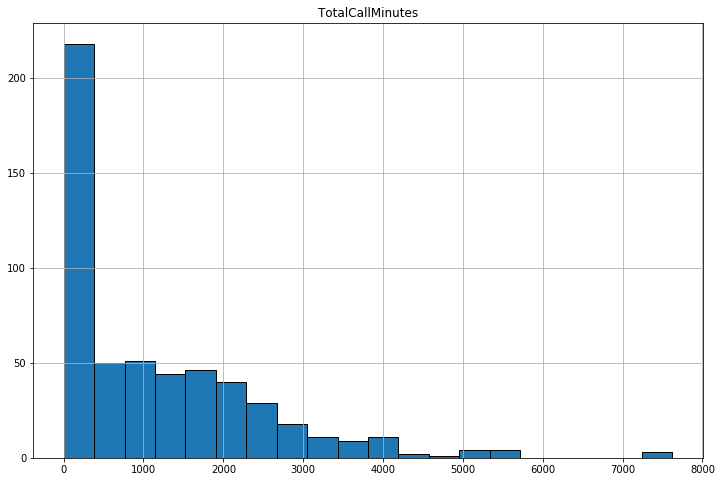

In [18]:
callminutes.hist(bins=20, ec='black', figsize=(12,8))

In [19]:
callminutes_var = callminutes.var()
callminutes_var

TotalCallMinutes    1.714333e+06
dtype: float64

In [20]:
callminutes['TotalCallMinutes'].fillna(0, inplace = True)

In [21]:
alpha_mle = expon.fit(callminutes['TotalCallMinutes'])[0]
beta_mle = expon.fit(callminutes['TotalCallMinutes'])[1]

In [22]:
(alpha_mle, beta_mle)

(0.0, 1148.0515653775321)

Maximum Likelihood Estimation

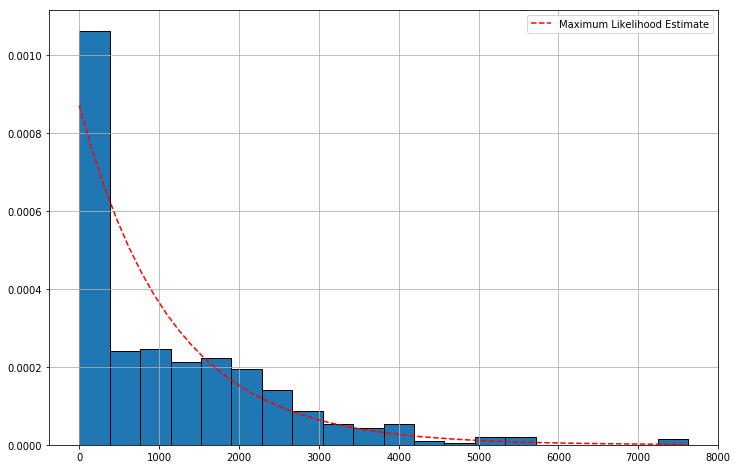

In [23]:
clm = callminutes['TotalCallMinutes']
clm.hist(density=True, bins=20, ec='black', figsize=(12,8))
x = np.linspace(0, clm.max())
l1,=plt.plot(x, expon.pdf(x, alpha_mle, beta_mle), 'r--', label="Maximum Likelihood Estimate")
plt.legend(handles=[l1])

Kernel Density Estimation - KDE

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


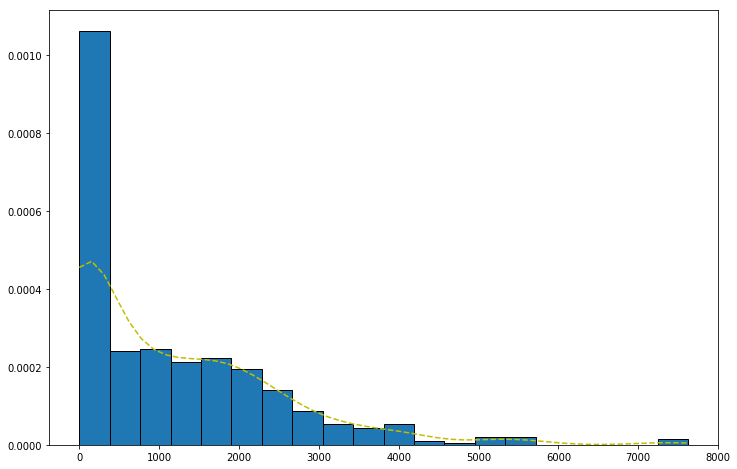

In [24]:
from scipy.stats import kde
clm.hist(normed=True, bins=20, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, clm.max())
density = kde.gaussian_kde(clm, bw_method=None)
xgrid = np.linspace(x.min(), x.max(), 100)

plt.plot(x, density(x), 'y--')

Comparing MLE and KDE

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


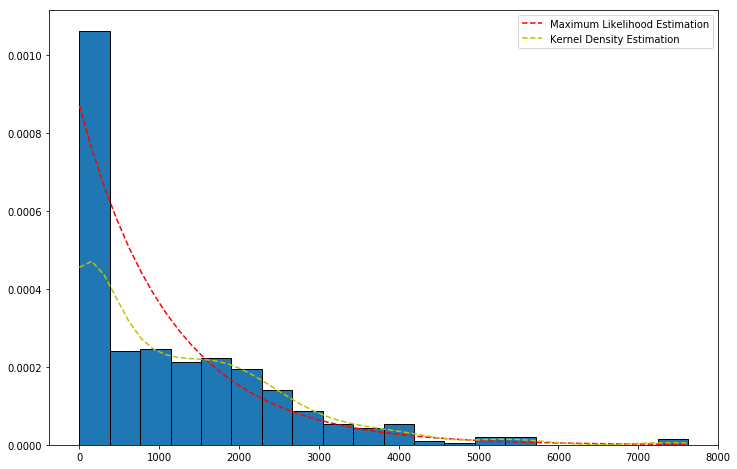

In [25]:
from scipy.stats import kde

clm.hist(normed=True, bins=20, grid=False, ec='black', figsize=(12,8))
x = np.linspace(0, clm.max())
density = kde.gaussian_kde(clm, bw_method=None)
xgrid = np.linspace(x.min(), x.max(), 100)

l2, = plt.plot(x, expon.pdf(x, alpha_mle, beta_mle), 'r--', label="Maximum Likelihood Estimation")
l3, = plt.plot(x, density(x), 'y--', label="Kernel Density Estimation")
plt.legend(handles=[l2,l3])

In [26]:
cdf = lambda ary: np.array([density.integrate_box_1d(-np.inf, x) for x in ary])

In [28]:
kstest(clm,cdf)

KstestResult(statistic=0.18869683226242048, pvalue=0.0)